In [1]:
# ignore warnings
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import wrangle
from acquire import get_zillow_data
# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#Modeling Imports
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans, dbscan
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_columns', 80)

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df = df.drop(columns=['parcelid', 'bathrooms', 'bedrooms', 'buildingquality', 'county','square_feet', 'lot_size', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unit_count', 'assessmentyear', 'transactiondate', 'heating_system',
       'age_bin', 'taxrate',  'acres_bin', 'sqft_bin', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'bath_bed_ratio','tax_value_bin', 'land_tax_value_bin'])

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.data_split(df)

In [5]:
X_train.shape

(38835, 12)

In [6]:
# scale the data

# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_train)

# Use the scaler
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

## <font color = 'red'> Cluster on All Columns

In [7]:
X = X_train_scaled

# Make the kmeans object
kmeans = KMeans(n_clusters=4)

# fit the kmeans model
kmeans.fit(X)

# use the thing
kmeans.predict(X)

array([3, 2, 3, ..., 1, 1, 1], dtype=int32)

In [8]:
X.shape

(38835, 12)

In [9]:
X_train_scaled["cluster_all"] = kmeans.predict(X)
X_validate_scaled['cluster_all'] = kmeans.predict(X_validate_scaled)
X_test_scaled['cluster_all'] = kmeans.predict(X_test_scaled)

In [10]:
X.head()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
0,0.0,0.589381,0.669595,0.456522,0.057297,0.177240,0.175609,0.154379,0.008115,0.109072,0.062633,0.0,3
1,0.0,0.555030,0.520939,0.369565,0.041100,0.061868,0.045434,0.052700,0.026685,0.072638,0.005155,1.0,2
2,0.0,0.448288,0.525143,0.318841,0.031542,0.083936,0.080044,0.071659,0.010607,0.098198,0.022185,0.0,3
3,0.0,0.513403,0.575186,0.449275,0.037221,0.032336,0.011908,0.031440,0.008580,0.026271,0.004116,1.0,2
4,0.0,0.590837,0.648049,0.442029,0.016427,0.015817,0.007444,0.012834,0.012647,0.027128,0.001799,0.0,3


In [11]:
X.cluster_all.value_counts()

3    15607
1    11097
2     8922
0     3209
Name: cluster_all, dtype: int64

In [12]:
cluster0 = X[X.cluster_all == 0]
cluster1 = X[X.cluster_all == 1]
cluster2 = X[X.cluster_all == 2]
cluster3 = X[X.cluster_all == 3]

In [13]:
cluster0.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,3209.0,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.0,3209.0
mean,1.0,0.611928,0.258832,0.268685,0.069311,0.091833,0.060824,0.073922,0.012481,0.083924,0.022578,0.0,0.0
std,0.0,0.044335,0.099811,0.130014,0.048240,0.067608,0.053880,0.052745,0.026014,0.031223,0.026342,0.0,0.0
min,1.0,0.481355,0.000000,0.000000,0.003617,0.003670,0.000720,0.000590,0.000000,0.012530,0.000023,0.0,0.0
25%,1.0,0.576311,0.154892,0.173913,0.040593,0.051453,0.027520,0.041360,0.006561,0.065931,0.009206,0.0,0.0
50%,1.0,0.608108,0.275940,0.268116,0.059190,0.079308,0.048255,0.064137,0.007980,0.082712,0.017188,0.0,0.0
75%,1.0,0.634049,0.342078,0.369565,0.083275,0.112377,0.079714,0.091669,0.010016,0.102134,0.028219,0.0,0.0
max,1.0,0.767707,0.441902,0.927536,0.541369,0.710272,0.639348,0.524534,0.558971,0.249166,0.401209,0.0,0.0


In [14]:
cluster1.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.000000,11097.0,11097.0
mean,0.296735,0.247673,0.868764,0.273225,0.059644,0.104388,0.083761,0.084221,0.008025,0.069723,0.039156,0.0,1.0
std,0.012921,0.084853,0.070382,0.128342,0.060460,0.092606,0.082956,0.072697,0.007195,0.036306,0.049349,0.0,0.0
min,0.000000,0.000000,0.562793,0.007246,0.000000,0.004248,0.000049,0.000000,0.000052,0.000023,0.000004,0.0,1.0
25%,0.297297,0.187707,0.809980,0.181159,0.025659,0.050865,0.033863,0.040942,0.005969,0.045256,0.013493,0.0,1.0
50%,0.297297,0.244045,0.869589,0.282609,0.041481,0.083528,0.066767,0.066768,0.007980,0.063893,0.026630,0.0,1.0
75%,0.297297,0.316597,0.928658,0.369565,0.069609,0.127080,0.107560,0.102400,0.007980,0.089779,0.047395,0.0,1.0
max,0.297297,0.411233,1.000000,0.833333,1.000000,1.000000,0.965576,0.807009,0.206709,0.916007,1.000000,0.0,1.0


In [15]:
cluster2.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,8922.0,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.0,8922.0
mean,0.0,0.526849,0.555974,0.407162,0.062451,0.102783,0.079624,0.088197,0.040407,0.084503,0.024853,1.0,2.0
std,0.0,0.081267,0.059745,0.181522,0.067126,0.107226,0.093117,0.090935,0.095069,0.059012,0.034938,0.0,0.0
min,0.0,0.249683,0.424844,0.007246,0.000028,0.000000,0.000000,0.001660,0.000700,0.000000,0.000000,1.0,2.0
25%,0.0,0.479611,0.511865,0.268116,0.027740,0.041586,0.023055,0.036572,0.006730,0.049077,0.003027,1.0,2.0
50%,0.0,0.542763,0.551693,0.427536,0.045294,0.074629,0.053328,0.064290,0.008482,0.075397,0.014328,1.0,2.0
75%,0.0,0.586143,0.605876,0.507246,0.072622,0.121794,0.097395,0.104131,0.020997,0.103993,0.031781,1.0,2.0
max,0.0,0.671479,0.689728,0.949275,0.950135,0.996108,0.990538,1.000000,0.914897,0.747232,0.805044,1.0,2.0


In [16]:
cluster3.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.000000,15607.0,15607.0
mean,0.000057,0.515294,0.688299,0.363454,0.052581,0.078172,0.056776,0.069386,0.037744,0.073708,0.019049,0.0,3.0
std,0.004122,0.177544,0.107349,0.165240,0.050218,0.080614,0.071357,0.063686,0.100222,0.044563,0.031671,0.0,0.0
min,0.000000,0.000157,0.304907,0.007246,0.000034,0.001453,0.000467,0.001400,0.000499,0.000091,0.000004,0.0,3.0
25%,0.000000,0.379039,0.609778,0.231884,0.025971,0.032557,0.012192,0.033606,0.006463,0.047396,0.002567,0.0,3.0
50%,0.000000,0.480154,0.696110,0.384058,0.040627,0.057733,0.036354,0.054179,0.008158,0.068254,0.008937,0.0,3.0
75%,0.000000,0.562318,0.749150,0.471014,0.062086,0.094004,0.073521,0.082746,0.016685,0.091365,0.025639,0.0,3.0
max,0.297297,1.000000,0.957180,1.000000,0.923273,0.950246,1.000000,0.756417,1.000000,1.000000,0.725208,0.0,3.0


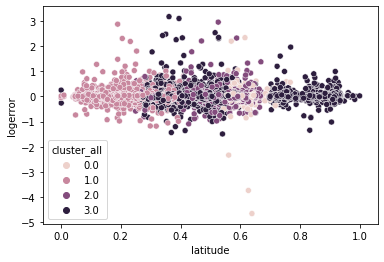

In [17]:
sns.scatterplot(x=X.latitude, y=y_train.logerror, hue=(X.cluster_all))

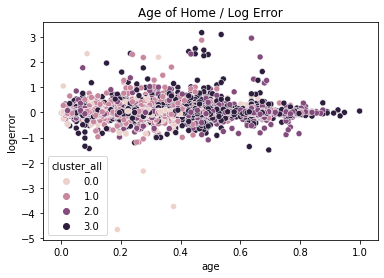

In [18]:
sns.scatterplot(x=X.age, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Age of Home / Log Error')
plt.show()

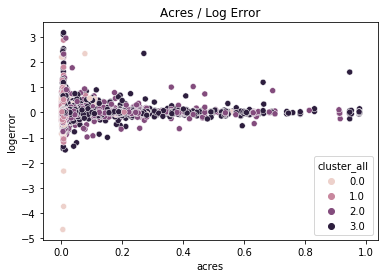

In [19]:
sns.scatterplot(x=X.acres, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Acres / Log Error')
plt.show()

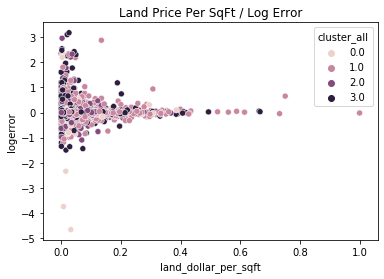

In [20]:
sns.scatterplot(x=X.land_dollar_per_sqft, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Land Price Per SqFt / Log Error')
plt.show()

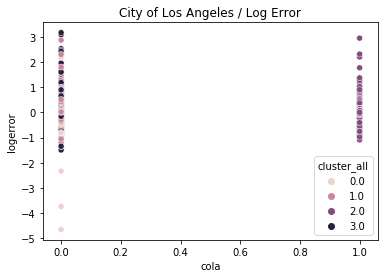

In [21]:
sns.scatterplot(x=X.cola, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('City of Los Angeles / Log Error')
plt.show()

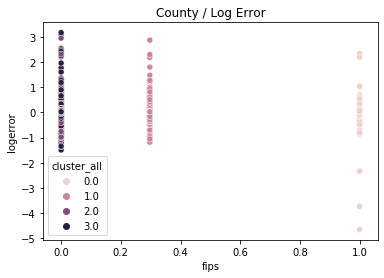

In [22]:
sns.scatterplot(x=X.fips, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('County / Log Error')
plt.show()

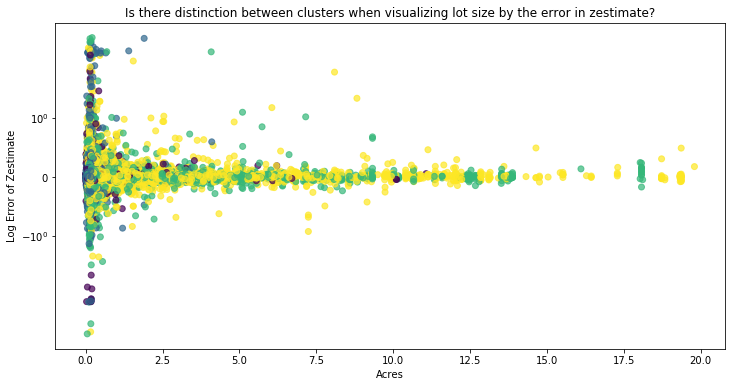

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.acres, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Acres')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing lot size by the error in zestimate?')
plt.show()

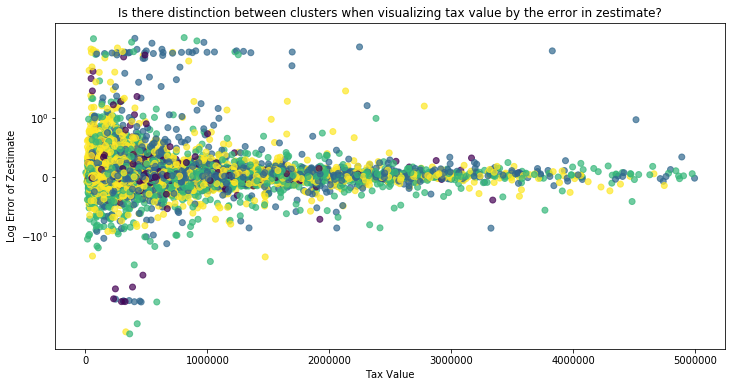

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.tax_value, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Tax Value')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing tax value by the error in zestimate?')
plt.show()

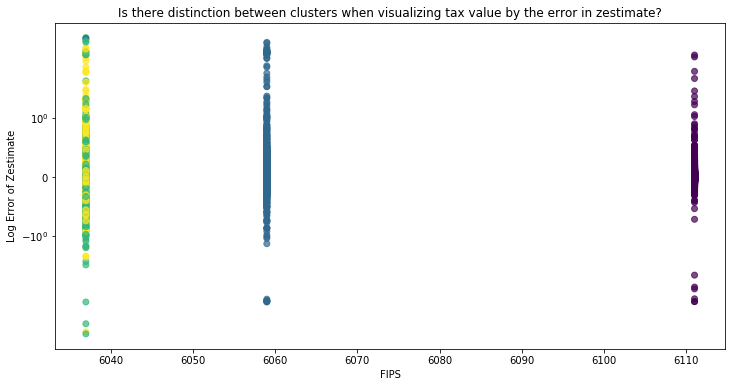

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.fips, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('FIPS')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing tax value by the error in zestimate?')
plt.show()

## <font color = 'red'> Cluster on Land Columns (size, cost, age)

In [26]:
X1 = X_train_scaled[['land_dollar_per_sqft', 'tax_value', 'age']]
X2 = X_validate_scaled[['land_dollar_per_sqft', 'tax_value', 'age']]
X3 = X_test_scaled[['land_dollar_per_sqft', 'tax_value', 'age']]
# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([3, 3, 0, ..., 3, 0, 4], dtype=int32)

In [94]:
k = 5
# as reminders: 
cluster_vars = ['land_dollar_per_sqft', 'tax_value', 'age']
cluster_name = 'sca_land_cluster'

In [95]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

In [97]:
kmeans = create_clusters(X_train_scaled, k, cluster_vars)

In [98]:
def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [99]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

In [100]:
centroid_df

,sca_land_cluster,centroid_land_dollar_per_sqft,centroid_tax_value,centroid_age
0,0,0.018581,0.071029,0.263823
1,1,0.021629,0.068666,0.436872
2,2,0.125039,0.466219,0.286119
3,3,0.031474,0.127076,0.108301
4,4,0.033097,0.084731,0.646614


In [27]:
X_train_scaled.shape

(38835, 13)

In [28]:
X_train_scaled['cluster_sca'] = kmeans.predict(X1)
X_validate_scaled['cluster_sca'] = kmeans.predict(X2)
X_test_scaled['cluster_sca'] = kmeans.predict(X3)

In [88]:
sca_centers=kmeans.cluster_centers_

In [30]:
X_train_scaled.head(1)

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all,cluster_sca
0,0.0,0.589381,0.669595,0.456522,0.057297,0.17724,0.175609,0.154379,0.008115,0.109072,0.062633,0.0,3,3


## <font color = 'red'> Cluster on Location Columns (latitude, longitude, cola, fips)

In [31]:
X1 = X_train_scaled[['latitude', 'longitude', 'cola', 'fips']]
X2 = X_validate_scaled[['latitude', 'longitude', 'cola', 'fips']]
X3 = X_test_scaled[['latitude', 'longitude', 'cola', 'fips']]
# Make the kmeans object
kmeans = KMeans(n_clusters=3)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

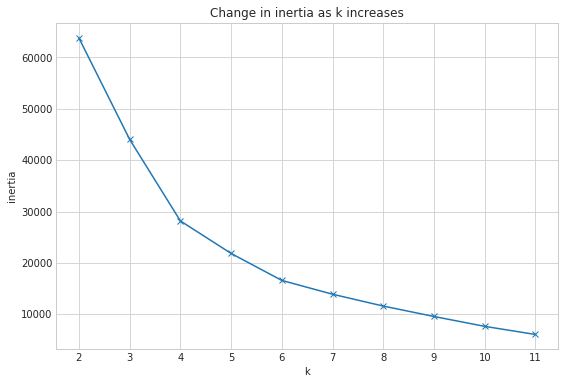

In [32]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [33]:
X_train_scaled['cluster_location'] = kmeans.predict(X1)
X_validate_scaled['cluster_location'] = kmeans.predict(X2)
X_test_scaled['cluster_location'] = kmeans.predict(X3)

In [89]:
loc_centers= kmeans.cluster_centers_

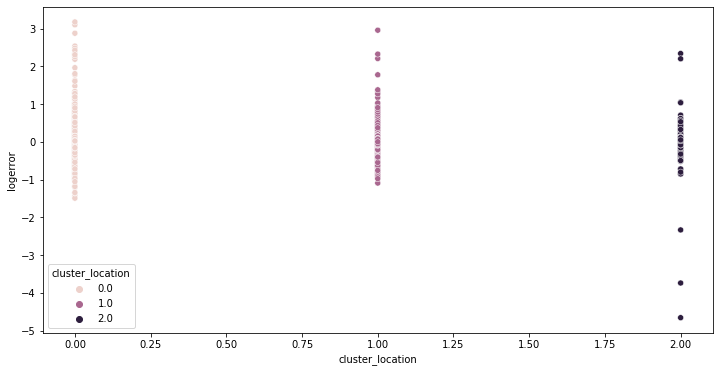

In [91]:
plt.figure(figsize=(12,6))
p= sns.scatterplot(x=X_train_scaled.cluster_location, y=y_train.logerror, hue=X_train_scaled.cluster_location)
p

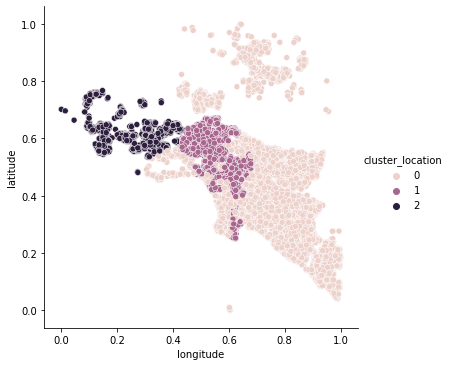

In [36]:
sns.relplot(x="longitude", y="latitude", hue="cluster_location", data=X_train_scaled)

## <font color = 'red'> Cluster on Tax (structure_tax_value, land_tax_value, taxamount)

In [37]:
X1 = X_train_scaled[['structure_tax_value', 'land_tax_value', 'taxamount']]
X2 = X_validate_scaled[['structure_tax_value', 'land_tax_value', 'taxamount']]
X3 = X_test_scaled[['structure_tax_value', 'land_tax_value', 'taxamount']]

# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([1, 0, 4, ..., 4, 4, 0], dtype=int32)

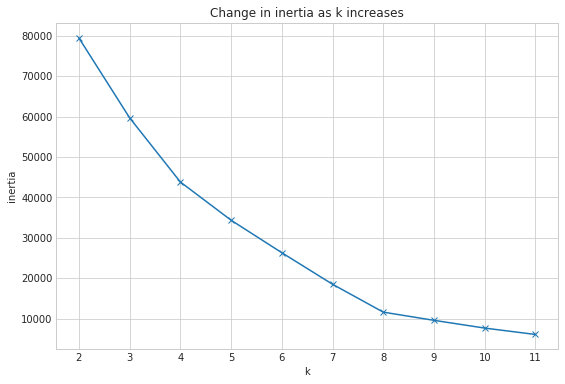

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [39]:
X_train_scaled['cluster_tax'] = kmeans.predict(X1)
X_validate_scaled['cluster_tax'] = kmeans.predict(X2)
X_test_scaled['cluster_tax'] = kmeans.predict(X3)

In [40]:
kmeans.cluster_centers_

array([[0.031988  , 0.02202207, 0.03438124],
       [0.10406974, 0.14398061, 0.14939347],
       [0.33976909, 0.53181298, 0.52042868],
       [0.19182608, 0.28165401, 0.28059381],
       [0.05645631, 0.07459017, 0.07994301]])

In [41]:
X_train_scaled.head(1)

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all,cluster_sca,cluster_location,cluster_tax
0,0.0,0.589381,0.669595,0.456522,0.057297,0.17724,0.175609,0.154379,0.008115,0.109072,0.062633,0.0,3,3,0,1


 ## <font color = 'red'> Cluster on Misc (age, acres, structure_dollar_per_sqft)

In [42]:
X1 = X_train_scaled[['age', 'acres', 'structure_dollar_per_sqft']]
X2 = X_validate_scaled[['age', 'acres', 'structure_dollar_per_sqft']]
X3 = X_test_scaled[['age', 'acres', 'structure_dollar_per_sqft']]
# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([1, 1, 3, ..., 1, 3, 0], dtype=int32)

In [43]:
X_train_scaled['cluster_misc'] = kmeans.predict(X1)
X_validate_scaled['cluster_misc'] = kmeans.predict(X2)
X_test_scaled['cluster_misc'] = kmeans.predict(X3)

In [44]:
kmeans.cluster_centers_

array([[0.10498771, 0.01647294, 0.11105573],
       [0.43493146, 0.01079102, 0.05915956],
       [0.64299814, 0.00820248, 0.0657042 ],
       [0.26212634, 0.02702827, 0.07820762],
       [0.2743932 , 0.44446381, 0.08979942]])

In [45]:
X_train_scaled.head(1)

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all,cluster_sca,cluster_location,cluster_tax,cluster_misc
0,0.0,0.589381,0.669595,0.456522,0.057297,0.17724,0.175609,0.154379,0.008115,0.109072,0.062633,0.0,3,3,0,1,1


In [46]:
clusters= X_train_scaled[['cluster_all','cluster_sca','cluster_location', 'cluster_tax', 'cluster_misc']]
clusters.head(3)

,cluster_all,cluster_sca,cluster_location,cluster_tax,cluster_misc
0,3,3,0,1,1
1,2,3,1,0,1
2,3,0,0,4,3


# Hypothesis Testing

𝐻0 : A properties land features has no correlation with log error.<br>
𝐻𝑎 : Properties with 

In [ ]:
alpha = 0.05
null_hypothesis = "There is no correlation between city and log error."

F, p = stats.f_oneway(train[train.cluster_tax == 0].log_error,
                      train[train.cluster_tax == 1].log_error,
                      train[train.cluster_tax == 2].log_error,
                      train[train.cluster_tax == 3].log_error)

if p >  α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

print('Anova Test Results on Tax Cluster')
print('F-value:',F)
print('P-value:',p)

# Modeling

In [47]:
# modeling methods
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### Creating a Baseline

In [48]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test= pd.DataFrame(y_test)

In [49]:
X_train_scaled.shape, y_validate.shape, X_validate_scaled.shape

((38835, 17), (16644, 1), (16644, 17))

In [50]:

# 1. Predict logerror_mean
logerror_pred_mean = y_train.logerror.mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean

# 2. compute logerror_logerrorpred_median
logerror_pred_median = y_train.logerror.median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

# 3. RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# 4. RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median) ** (1/2)
rmse_validate_baseline = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate_baseline)

RMSE using Mean
Train/In-Sample:  0.16471743733642322 
Validate/Out-of-Sample:  0.16847821920209324
RMSE using Median
Train/In-Sample:  0.165016885314455 
Validate/Out-of-Sample:  0.16880432248345412


In [51]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_mean)}])

#### Linear Regression Model (OLS Regressor)

In [52]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train_scaled, y_train.logerror)

# predict train
# 
# use the thing!
# 
y_train['logerror_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm) ** (1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.16436914563463753 
Validation/Out-of-Sample:  0.16828360818949498


In [53]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)}, ignore_index=True)
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,0.168478,0.000000
1,OLS Regressor,0.168284,0.002313


#### Lasso Lars

In [54]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.16471743733642322 
Validation/Out-of-Sample:  0.16847821920209324


In [55]:
metric_df = metric_df.append({
    'model': 'Lasso Lars', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)}, ignore_index=True)
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,0.168478,0.000000
1,OLS Regressor,0.168284,0.002313
2,Lasso Lars,0.168478,0.002313


#### Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree = pf.transform(X_validate_scaled)
X_test_degree =  pf.transform(X_test_scaled)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2) ** (1/2)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16436914563463753 
Validation/Out-of-Sample:  0.028319372785275465


In [57]:
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)}, ignore_index=True)
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,0.168478,0.000000
1,OLS Regressor,0.168284,0.002313
2,Lasso Lars,0.168478,0.002313
3,Quadratic Model,0.028319,0.002313


## Modeling using different features

In [58]:
X_train_features1 = X_train_scaled[['cluster_sca']]
X_train_features2 = X_train_scaled[['cluster_location']]
X_train_features3 = X_train_scaled[['cluster_tax']]
X_train_features4 = X_train_scaled[['cluster_misc']]


X_validate_features1 = X_validate_scaled[['cluster_sca']]
X_validate_features2 = X_validate_scaled[['cluster_location']]
X_validate_features3 = X_validate_scaled[['cluster_tax']]
X_validate_features4 = X_validate_scaled[['cluster_misc']]

X_test_features1 = X_test_scaled[['cluster_sca']]
X_test_features2 = X_test_scaled[['cluster_location']]
X_test_features3 = X_test_scaled[['cluster_tax']]
X_test_features4 = X_test_scaled[['cluster_misc']]

Baseline

RMSE using Mean
Train/In-Sample:  0.16471743733642322  <br>
Validate/Out-of-Sample:  0.16847821920209324 <br>
RMSE using Median
Train/In-Sample:  0.165016885314455 <br>
Validate/Out-of-Sample:  0.16880432248345412 <br>

In [59]:
# create the model object
# 
# make the thing
# 
# Fit Model
lm.fit(X_train_features1, y_train.logerror)

# Make Predictions
lm_pred = lm.predict(X_train_features1)



# predict train
# 
# use the thing!
# 
y_train['logerror_pred_sca_lm'] = lm.predict(X_train_features1)

# evaluate: rmse
rmse_train_sca = mean_squared_error(y_train.logerror, y_train.logerror_pred_sca_lm) ** (1/2)

# predict validate
y_validate['logerror_pred_sca_lm'] = lm.predict(X_validate_features1)

# evaluate: rmse
rmse_validate_sca = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_sca_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_sca, 
      "\nValidation/Out-of-Sample: ", rmse_validate_sca)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.16469874260237718 
Validation/Out-of-Sample:  0.16844394122293677


In [60]:
# create the model object
# 
# make the thing
# 
# Fit Model
lm.fit(X_train_features2, y_train.logerror)

# Make Predictions
lm_pred = lm.predict(X_train_features2)



# predict train
# 
# use the thing!
# 
y_train['logerror_pred_loc_lm'] = lm.predict(X_train_features2)

# evaluate: rmse
rmse_train_loc = mean_squared_error(y_train.logerror, y_train.logerror_pred_loc_lm) ** (1/2)

# predict validate
y_validate['logerror_pred_loc_lm'] = lm.predict(X_validate_features2)

# evaluate: rmse
rmse_validate_loc = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_loc_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_loc, 
      "\nValidation/Out-of-Sample: ", rmse_validate_loc)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.1646866540376655 
Validation/Out-of-Sample:  0.16846363035096903


In [61]:
# create the model object
# 
# make the thing
# 
# Fit Model
lm.fit(X_train_features3, y_train.logerror)

# Make Predictions
lm_pred = lm.predict(X_train_features3)


# predict train
# 
# use the thing!
# 
y_train['logerror_pred_tax_lm'] = lm.predict(X_train_features3)

# evaluate: rmse
rmse_train_tax = mean_squared_error(y_train.logerror, y_train.logerror_pred_tax_lm) ** (1/2)

# predict validate
y_validate['logerror_pred_tax_lm'] = lm.predict(X_validate_features3)

# evaluate: rmse
rmse_validate_tax = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_tax_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_tax, 
      "\nValidation/Out-of-Sample: ", rmse_validate_tax)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.1646878224952932 
Validation/Out-of-Sample:  0.16848505617673273


In [62]:
# create the model object
# 
# make the thing
# 
# Fit Model
lm.fit(X_train_features4, y_train.logerror)

# Make Predictions
lm_pred = lm.predict(X_train_features4)


# predict train
# 
# use the thing!
# 
y_train['logerror_pred_misc_lm'] = lm.predict(X_train_features4)

# evaluate: rmse
rmse_train_misc = mean_squared_error(y_train.logerror, y_train.logerror_pred_misc_lm) ** (1/2)

# predict validate
y_validate['logerror_pred_misc_lm'] = lm.predict(X_validate_features4)

# evaluate: rmse
rmse_validate_misc = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_misc_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_misc, 
      "\nValidation/Out-of-Sample: ", rmse_validate_misc)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.16471270835494412 
Validation/Out-of-Sample:  0.1684582547416392


In [63]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate_baseline': rmse_validate_baseline,
    'model': 'linear_regression',
    'RMSE_validate SCA': rmse_validate_sca,
   'RMSE_validate LOC': rmse_validate_loc,
    'RMSE_validate Tax': rmse_validate_tax,
    'RMSE_validate Misc': rmse_validate_misc
    }])

In [64]:
metric_df

,model,RMSE_validate_baseline,RMSE_validate SCA,RMSE_validate LOC,RMSE_validate Tax,RMSE_validate Misc
0,linear_regression,0.168804,0.168444,0.168464,0.168485,0.168458


### Lasso Lars

In [65]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train_features1, y_train.logerror)

# predict train
y_train['logerror_pred_sca_lars'] = lars.predict(X_train_features1)

# evaluate: rmse
rmse_train_sca = mean_squared_error(y_train.logerror, y_train.logerror_pred_sca_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_sca_lars'] = lars.predict(X_validate_features1)

# evaluate: rmse
rmse_validate_sca = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_sca_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_sca, 
      "\nValidation/Out-of-Sample: ", rmse_validate_sca)

RMSE for Lasso + Lars
Training/In-Sample:  0.16471743733642322 
Validation/Out-of-Sample:  0.16847821920209324


In [66]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, loc
# since we have converted it to a dataframe from a series!
lars.fit(X_train_features2, y_train.logerror)

# predict train
y_train['logerror_pred_loc_lars'] = lars.predict(X_train_features2)

# evaluate: rmse
rmse_train_loc = mean_squared_error(y_train.logerror, y_train.logerror_pred_loc_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_loc_lars'] = lars.predict(X_validate_features2)

# evaluate: rmse
rmse_validate_loc = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_loc_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_loc, 
      "\nValidation/Out-of-Sample: ", rmse_validate_loc)

RMSE for Lasso + Lars
Training/In-Sample:  0.16471743733642322 
Validation/Out-of-Sample:  0.16847821920209324


In [67]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, loc
# since we have converted it to a dataframe from a series!
lars.fit(X_train_features3, y_train.logerror)

# predict train
y_train['logerror_pred_tax_lars'] = lars.predict(X_train_features3)

# evaluate: rmse
rmse_train_tax = mean_squared_error(y_train.logerror, y_train.logerror_pred_tax_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_tax_lars'] = lars.predict(X_validate_features3)

# evaluate: rmse
rmse_validate_tax = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_tax_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_tax, 
      "\nValidation/Out-of-Sample: ", rmse_validate_tax)

RMSE for Lasso + Lars
Training/In-Sample:  0.16471743733642322 
Validation/Out-of-Sample:  0.16847821920209324


In [68]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, loc
# since we have converted it to a dataframe from a series!
lars.fit(X_train_features4, y_train.logerror)

# predict train
y_train['logerror_pred_misc_lars'] = lars.predict(X_train_features4)

# evaluate: rmse
rmse_train_misc = mean_squared_error(y_train.logerror, y_train.logerror_pred_misc_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_misc_lars'] = lars.predict(X_validate_features4)

# evaluate: rmse
rmse_validate_misc = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_misc_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_misc, 
      "\nValidation/Out-of-Sample: ", rmse_validate_misc)

RMSE for Lasso + Lars
Training/In-Sample:  0.16471743733642322 
Validation/Out-of-Sample:  0.16847821920209324


In [69]:
metric_df = metric_df.append({
    'model': 'mean_baseline', 
    'RMSE_validate_baseline': rmse_validate_baseline,
    'model': 'lasso LARS',
    'RMSE_validate SCA': rmse_validate_sca,
   'RMSE_validate LOC': rmse_validate_loc,
    'RMSE_validate Tax': rmse_validate_tax,
    'RMSE_validate Misc': rmse_validate_misc}, ignore_index=True)
metric_df

,model,RMSE_validate_baseline,RMSE_validate SCA,RMSE_validate LOC,RMSE_validate Tax,RMSE_validate Misc
0,linear_regression,0.168804,0.168444,0.168464,0.168485,0.168458
1,lasso LARS,0.168804,0.168478,0.168478,0.168478,0.168478


#### Polynomial Regression

X_train_features1 = X_train_scaled[['cluster_sca']]
X_train_features2 = X_train_scaled[['cluster_location']]
X_train_features3 = X_train_scaled[['cluster_tax']]
X_train_features4 = X_train_scaled[['cluster_misc']]

In [70]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree = pf.fit_transform(X_train_features1)

# transform X_validate_scaled & X_test_scaled
X_validate_degree = pf.transform(X_validate_features1)
X_test_degree =  pf.transform(X_test_features1)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_features1, y_train.logerror)

# predict train
y_train['logerror_pred_sca_lm2'] = lm2.predict(X_train_features1)

# evaluate: rmse
rmse_train_sca = mean_squared_error(y_train.logerror, y_train.logerror_pred_sca_lm2) ** (1/2)

# predict validate
y_validate['logerror_pred_sca_lm2'] = lm2.predict(X_validate_features1)

# evaluate: rmse
rmse_validate_sca = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_sca_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_sca, 
      "\nValidation/Out-of-Sample: ", rmse_validate_sca)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16469874260237718 
Validation/Out-of-Sample:  0.028373361334716178


In [71]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree = pf.fit_transform(X_train_features2)

# transform X_validate_scaled & X_test_scaled
X_validate_degree = pf.transform(X_validate_features2)
X_test_degree =  pf.transform(X_test_features2)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_features1, y_train.logerror)

# predict train
y_train['logerror_pred_loc_lm2'] = lm2.predict(X_train_features2)

# evaluate: rmse
rmse_train_loc = mean_squared_error(y_train.logerror, y_train.logerror_pred_loc_lm2) ** (1/2)

# predict validate
y_validate['logerror_pred_loc_lm2'] = lm2.predict(X_validate_features2)

# evaluate: rmse
rmse_validate_loc = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_loc_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_loc, 
      "\nValidation/Out-of-Sample: ", rmse_validate_loc)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16475704806468647 
Validation/Out-of-Sample:  0.02839896695005171


In [72]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree = pf.fit_transform(X_train_features3)

# transform X_validate_scaled & X_test_scaled
X_validate_degree = pf.transform(X_validate_features3)
X_test_degree =  pf.transform(X_test_features3)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_features1, y_train.logerror)

# predict train
y_train['logerror_pred_tax_lm2'] = lm2.predict(X_train_features3)

# evaluate: rmse
rmse_train_tax = mean_squared_error(y_train.logerror, y_train.logerror_pred_tax_lm2) ** (1/2)

# predict validate
y_validate['logerror_pred_tax_lm2'] = lm2.predict(X_validate_features3)

# evaluate: rmse
rmse_validate_tax = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_tax_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_tax, 
      "\nValidation/Out-of-Sample: ", rmse_validate_tax)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16479830010889251 
Validation/Out-of-Sample:  0.02840062724905059


In [73]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree = pf.fit_transform(X_train_features4)

# transform X_validate_scaled & X_test_scaled
X_validate_degree = pf.transform(X_validate_features4)
X_test_degree =  pf.transform(X_test_features4)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_features4, y_train.logerror)

# predict train
y_train['logerror_pred_misc_lm2'] = lm2.predict(X_train_features4)

# evaluate: rmse
rmse_train_misc = mean_squared_error(y_train.logerror, y_train.logerror_pred_misc_lm2) ** (1/2)

# predict validate
y_validate['logerror_pred_misc_lm2'] = lm2.predict(X_validate_features4)

# evaluate: rmse
rmse_validate_misc = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_misc_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_misc, 
      "\nValidation/Out-of-Sample: ", rmse_validate_misc)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16471270835494412 
Validation/Out-of-Sample:  0.028378183590599005


In [74]:
metric_df = metric_df.append({
    'model': 'mean_baseline', 
    'RMSE_validate_baseline': rmse_validate_baseline,
    'model': 'Polynomial',
    'RMSE_validate SCA': rmse_validate_sca,
   'RMSE_validate LOC': rmse_validate_loc,
    'RMSE_validate Tax': rmse_validate_tax,
    'RMSE_validate Misc': rmse_validate_misc}, ignore_index=True)
metric_df

,model,RMSE_validate_baseline,RMSE_validate SCA,RMSE_validate LOC,RMSE_validate Tax,RMSE_validate Misc
0,linear_regression,0.168804,0.168444,0.168464,0.168485,0.168458
1,lasso LARS,0.168804,0.168478,0.168478,0.168478,0.168478
2,Polynomial,0.168804,0.028373,0.028399,0.028401,0.028378
